In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
data=pd.read_csv('ds_salaries.csv')

In [4]:
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [5]:
data=data.drop(['Unnamed: 0'],axis=1)

# Understanding Dataset 

In [6]:
data.shape

(607, 11)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [8]:
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,607.0,2021.405272,6.921330e-01,2020.0,2021.0,2022.0,2022.0,2022.0
salary,607.0,324000.062603,1.544357e+06,4000.0,70000.0,115000.0,165000.0,30400000.0
salary_in_usd,607.0,112297.869852,7.095726e+04,2859.0,62726.0,101570.0,150000.0,600000.0
remote_ratio,607.0,70.922570,4.070913e+01,0.0,50.0,100.0,100.0,100.0


# EDA and Data Visualization

<AxesSubplot:>

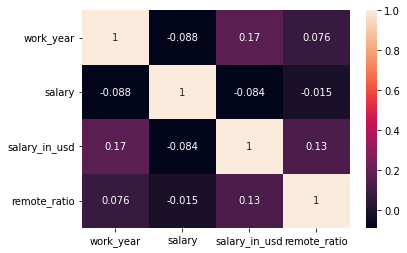

In [10]:
sns.heatmap(data.corr(),annot=True)

correlation  heatmap is showing that their is a very small relation between columns

In [11]:
d=pd.DataFrame(data.work_year.value_counts())
d

,work_year
2022,318
2021,217
2020,72


In [12]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n{}".format(pct, absolute)

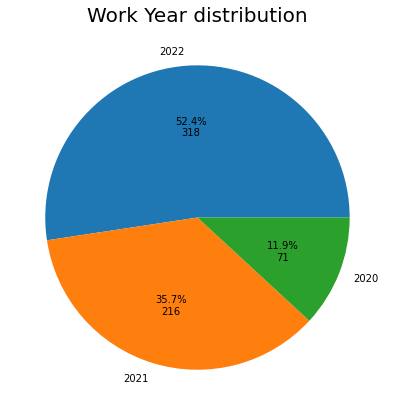

In [13]:
d=data.work_year.value_counts()
plt.figure(figsize=(7,7))
plt.title('Work Year distribution',size=20)
plt.pie(d,autopct=lambda pct: func(pct,d),labels=d.index)
plt.show()

Pie chart of "work year" showing that Data Science Jobs are increased from 2020 to 2022.

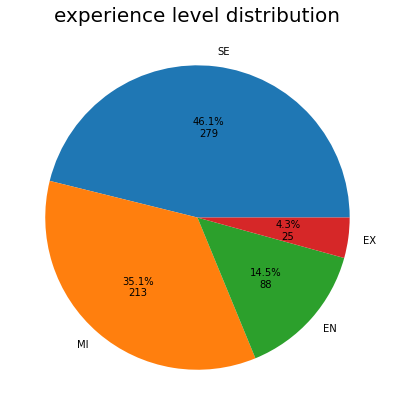

In [14]:
d=data.experience_level.value_counts()
plt.figure(figsize=(7,7))
plt.title('experience level distribution',size=20)
plt.pie(d,autopct=lambda pct: func(pct,d),labels=d.index)
plt.show()

Most of the employees having senior level Experience

c:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, '588'), Text(0, 0, '5'), Text(0, 0, '10'), Text(0, 0, '4')]

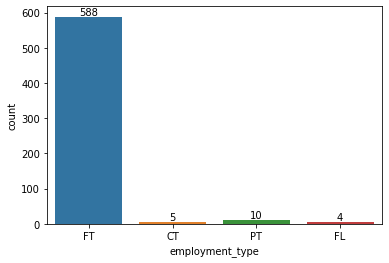

In [15]:
ax=sns.countplot(data['employment_type'])
ax.bar_label(ax.containers[0])

Most of the employees have Full Time jobs

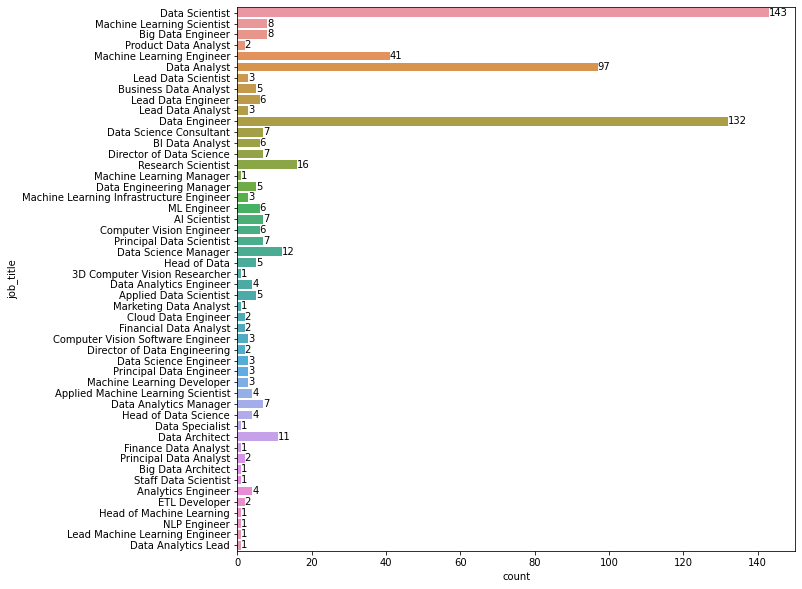

In [16]:
plt.figure(figsize=(10,10))
ax=sns.countplot(y=data.job_title)
ax.bar_label(ax.containers[0])
plt.show()

Most of the people have Data Scientist,Data Engineer,Data Analyist and Machine Learning Engineer jobs

c:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary_in_usd', ylabel='Density'>

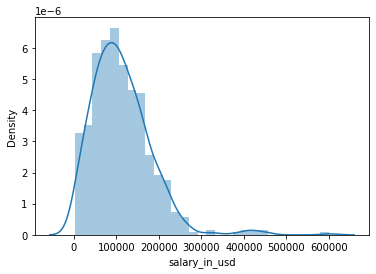

In [17]:
sns.distplot(data.salary_in_usd)

1-Most of job salaries lies between 50000$ and 150000$   
2- Only some of job Salaries are greater than 250000$

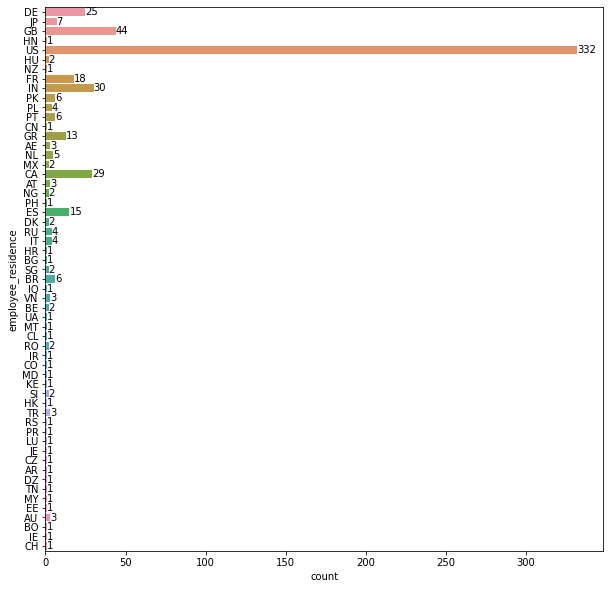

In [18]:
plt.figure(figsize=(10,10))
ax=sns.countplot(y=data.employee_residence)
ax.bar_label(ax.containers[0])
plt.show()

1- Most of Employees having residence in "US"

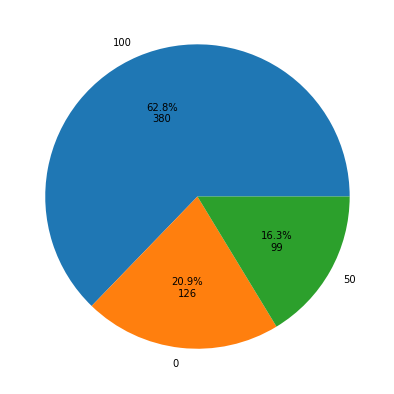

In [19]:
d=data.remote_ratio.value_counts()
plt.figure(figsize=(7,7))
data.remote_ratio=data.remote_ratio.replace([0,50,100],['No Remote','Partialy Remote','Fully Remote'])
plt.pie(d,labels=d.index,autopct=lambda pct:func(pct,d))
plt.show()

Most of Employees are working remotely, Probably due to COVID

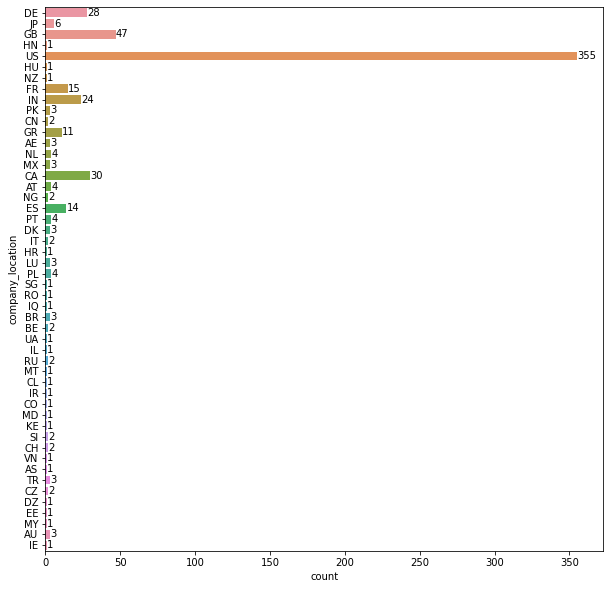

In [20]:
plt.figure(figsize=(10,10))
ax=sns.countplot(y=data.company_location)
ax.bar_label(ax.containers[0])
plt.show()

 Most of the companies are  in  "US"

# Ask question and solve it

**1- How Many Empoyees Are working in There own Country?**

In [21]:
print('Total Employees: ',data.shape[0],'\n')
print('Employees Working in There Own Country ')
data[data.employee_residence==data.company_location].shape[0]

Total Employees:  607 

Employees Working in There Own Country 


556

**2-How employees are changing their jobs from 2020 t0 2022 from no remote to fully remote?**

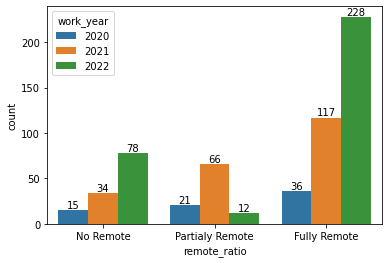

In [22]:
ax=sns.countplot(x=data.remote_ratio,hue=data.work_year)
for count in ax.containers:
    ax.bar_label(count)

**2020**: In 2020 there were small difference between number employees working No remote,partialy remote , fully remote   
**2021:** In this year number of employees doing Partialy and fully remote have more increase as compared to increase in 
      No Remote   
**2022**: In 2022 there is greater increase in remote jobs, but there is decrease in Partialy Remote jobs, may be partialy remote jobs converted to fully remote due to COVID.

**3- How has the average salary of data science jobs change over time?**

c:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Avg salary in usd')

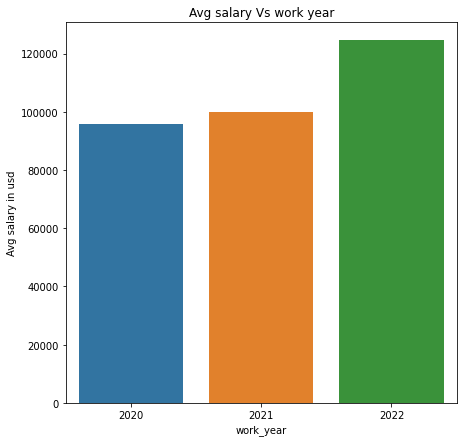

In [23]:
plt.figure(figsize=(7,7))
d=data.groupby(['work_year'])['salary_in_usd'].mean()
ax=sns.barplot(d.index,d)
ax.set_title('Avg salary Vs work year')
ax.set_ylabel('Avg salary in usd')

Average salary is increasing over time

**4- Should I work Part Time,Full Time, Contract base or as a Freelancer to get higher salary?**

c:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Average salary_in_usd')

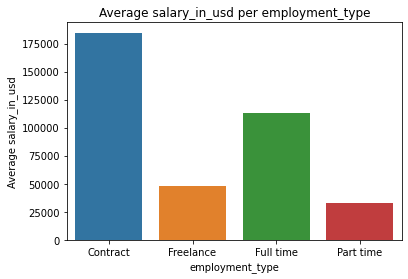

In [24]:
d=data.groupby(['employment_type'])['salary_in_usd'].mean()
ax=sns.barplot(d.index,d)
ax.set_xticklabels(['Contract','Freelance','Full time','Part time'])
ax.set_title('Average salary_in_usd per employment_type')
ax.set_ylabel('Average salary_in_usd')

Contract base Employees are Earning higher salary

**5- What are the salaries of Data Science jobs based on experience level?**

c:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Average salary_in_usd')

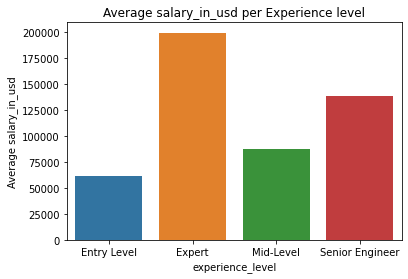

In [25]:
d=data.groupby(['experience_level'])['salary_in_usd'].mean()
ax=sns.barplot(d.index,d)
ax.set_xticklabels(['Entry Level', 'Expert', 'Mid-Level', 'Senior Engineer'])
ax.set_title('Average salary_in_usd per Experience level')
ax.set_ylabel('Average salary_in_usd')

Expert Level job have high salary  
**Salary order:** Entery Level< Midel Level< Senior Level< Expert Level

**6- Working in large companies, the salary is higher than other types of companies?**

c:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Average salary_in_usd')

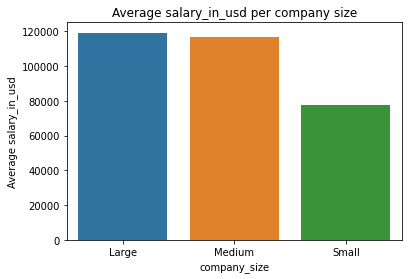

In [26]:
d=data.groupby(['company_size'])['salary_in_usd'].mean()
ax=sns.barplot(d.index,d)
ax.set_xticklabels(['Large', 'Medium', 'Small'])
ax.set_title('Average salary_in_usd per company size')
ax.set_ylabel('Average salary_in_usd')

large companies have highest Average salary